# Loan Application Status Prediction

# import the neccessary libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# import the dataframe

In [24]:
df=pd.read_csv('loan_prediction.csv')

# display top 5 rows of dataset

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# display last five rows of the dataset

In [47]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# display number of rows and columns

In [27]:
print('Rows...',df.shape[0])
print('Columns...',df.shape[1])

Rows... 614
Columns... 13


# GET INFORMATION ABOUT OUT DATASET LIKE TOTAL NUMBER OF ROWS,COLUMNS, DATATYPES OF EACH COLUMN AND MEMORY REQUIREMENT

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# checking null values

In [30]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# filling null values

In [38]:
#filling null values of gender column
mode=df['Gender'].mode()
df['Gender']=df['Gender'].fillna(mode[0])

#fill null values of Married column
mode=df['Married'].mode()
df['Married']=df['Married'].fillna(mode[0])

#fill null values of Dependents column
mode=df['Dependents'].mode()
df['Dependents']=df['Dependents'].fillna(mode[0])

#fill nulll values of Self_Employed column
mode=df['Self_Employed'].mode()
df['Self_Employed']=df['Self_Employed'].fillna(mode[0])



In [48]:
#filling null values of LoanAmount column

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

#fill null values  of Loan_Amount_Term column

df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

#filling null values of Credit_History column
mode=df['Credit_History'].mode()
df['Credit_History']=df['Credit_History'].fillna(mode[0])

In [49]:
#chwcking again null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

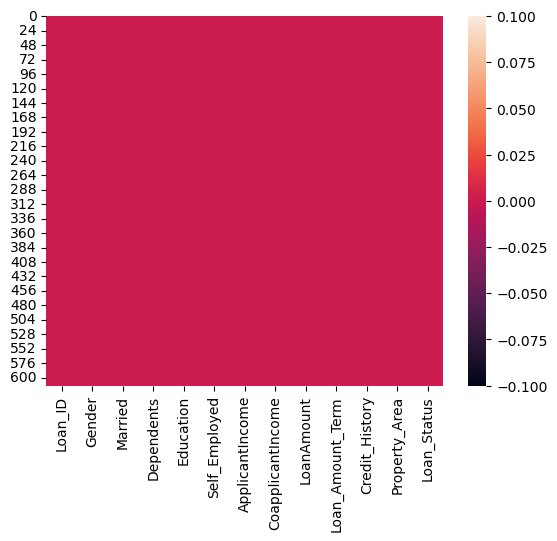

In [50]:
sns.heatmap(df.isnull())

# checking number of unique values in each column

In [52]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# dataset description

In [53]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# droping loan_ID column

In [56]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [58]:
df=df.drop('Loan_ID',axis=1)

# checking unique values in target variable

In [60]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [61]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Data Visualization 

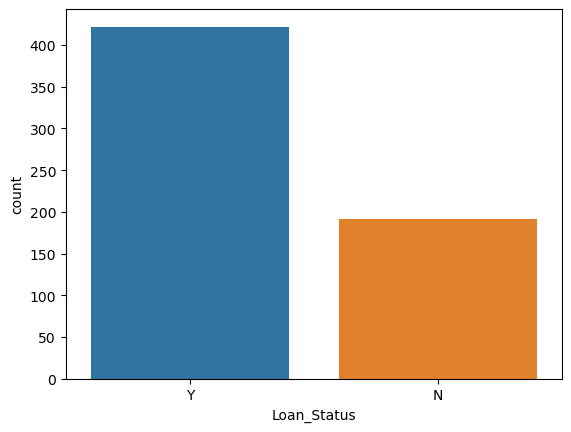

Y    422
N    192
Name: Loan_Status, dtype: int64

In [65]:
plt.Figure(figsize=(3,3))
sns.countplot(x='Loan_Status',data=df)
plt.show()
df['Loan_Status'].value_counts()

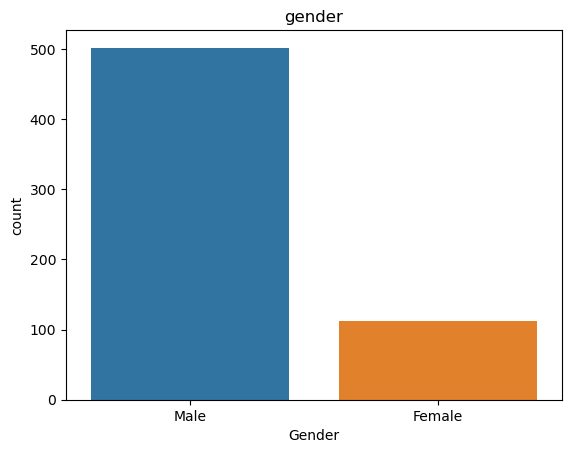

Male      502
Female    112
Name: Gender, dtype: int64

In [67]:
#countplot for gender column
plt.Figure(figsize=(3,3))
sns.countplot(x='Gender',data=df)
plt.title('gender')
plt.show()
df['Gender'].value_counts()

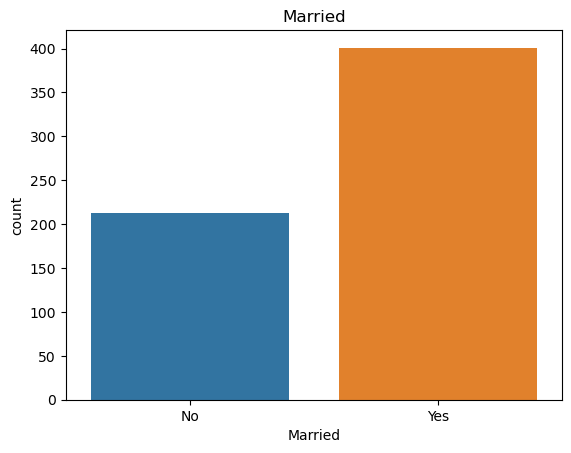

Yes    401
No     213
Name: Married, dtype: int64

In [68]:
#countplot for Married column
plt.Figure(figsize=(3,3))
sns.countplot(x='Married',data=df)
plt.title('Married')
plt.show()
df['Married'].value_counts()

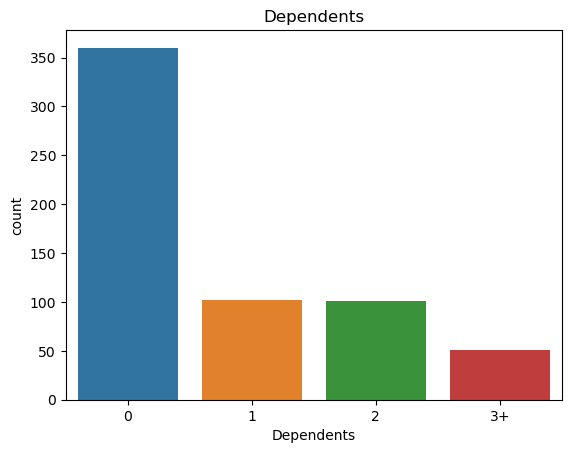

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [69]:
#countplot for Dependents column
plt.Figure(figsize=(3,3))
sns.countplot(x='Dependents',data=df)
plt.title('Dependents')
plt.show()
df['Dependents'].value_counts()

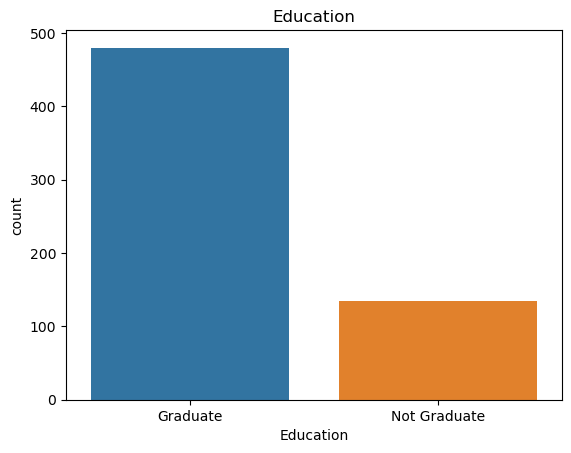

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [70]:
#countplot for Education column
plt.Figure(figsize=(3,3))
sns.countplot(x='Education',data=df)
plt.title('Education')
plt.show()
df['Education'].value_counts()

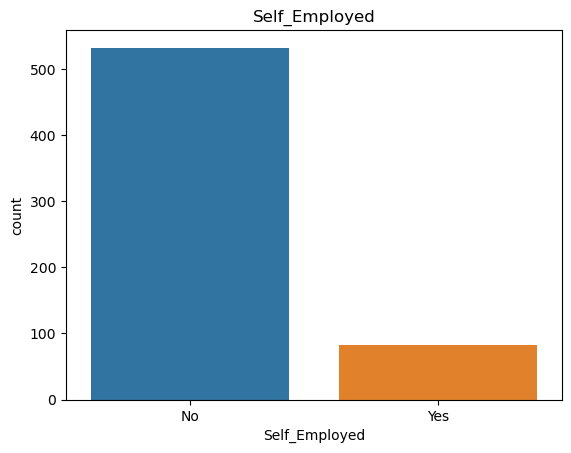

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [71]:
#countplot for Self_Employed column
plt.Figure(figsize=(3,3))
sns.countplot(x='Self_Employed',data=df)
plt.title('Self_Employed')
plt.show()
df['Self_Employed'].value_counts()

# Seperating Categorical column and Numerical Column

In [73]:
#checking for categorical columna
categorical_col=[]
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
        

# All categorical Column

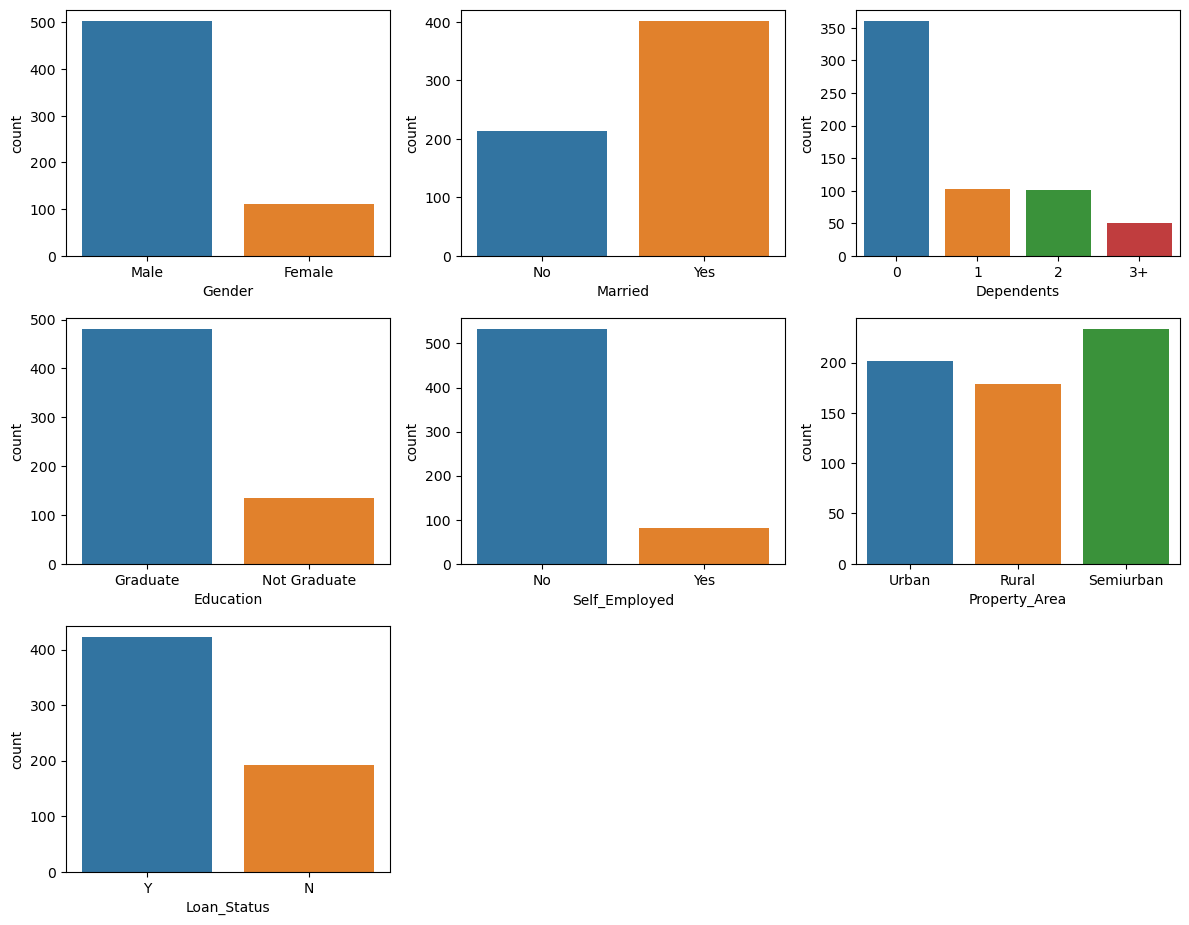

In [74]:
plt.figure(figsize=(12,12))
plt_num=1
for i in categorical_col:
    if plt_num<=10:
        plt.subplot(3,3,plt_num)
        sns.countplot(x=i,data=df)
    plt_num+=1
    plt.tight_layout()

# Distribution of Numdrical Colum

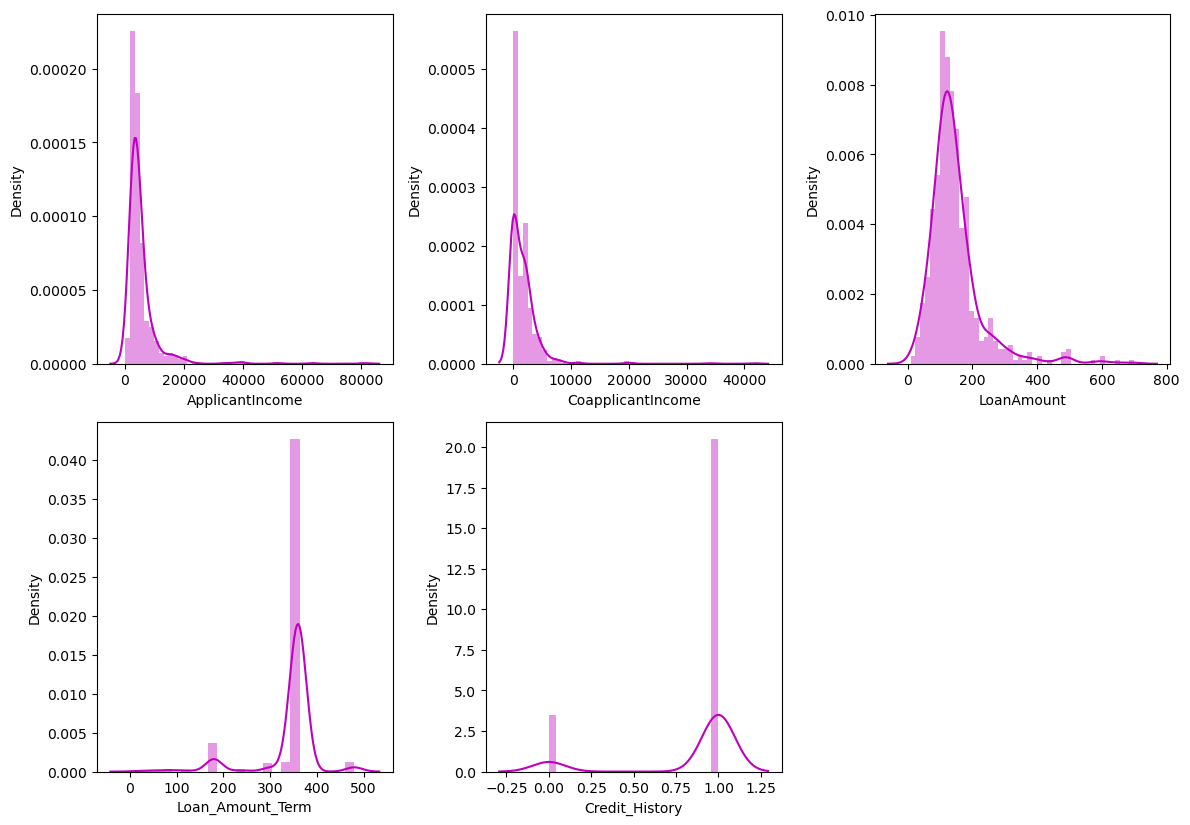

In [78]:
plt.figure(figsize=(12,12))
plot_num=1
for i in numerical_col:
    if plot_num<=8:
        plt.subplot(3,3,plot_num)
        sns.distplot(df[i],color='m')
        plt.xlabel(i)
    plot_num+=1
    plt.tight_layout()

# stripplot

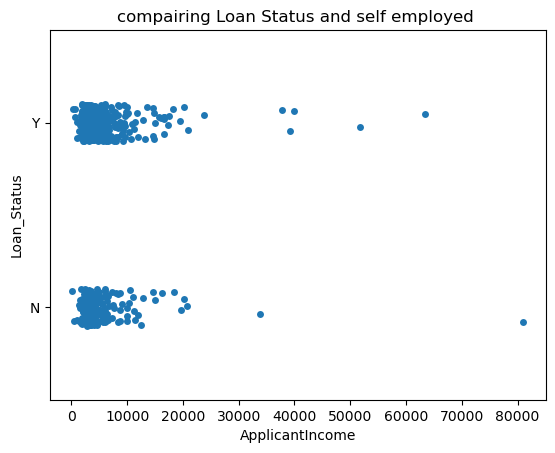

In [82]:
#compairing tanure and SeniorCitizen
plt.title('compairing Loan Status and self employed ')
sns.stripplot(x='ApplicantIncome',y='Loan_Status', data=df)
plt.show()

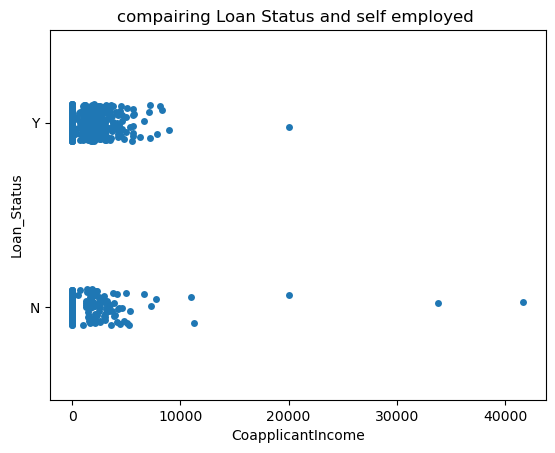

In [84]:
#compairing tanure and SeniorCitizen
plt.title('compairing Loan Status and CoapplicantIncome ')
sns.stripplot(x='CoapplicantIncome',y='Loan_Status', data=df)
plt.show()

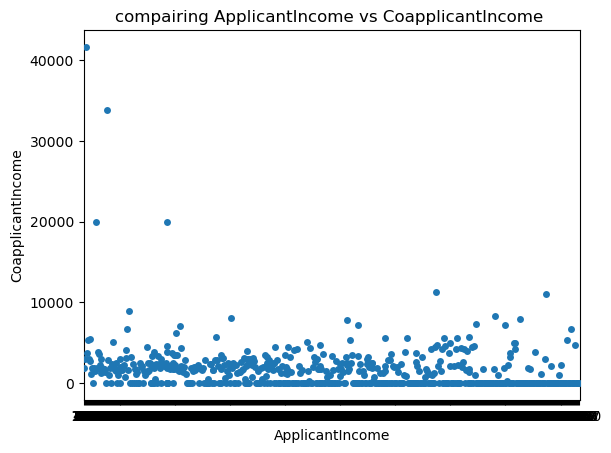

In [85]:
#compairing tanure and SeniorCitizen
plt.title('compairing ApplicantIncome vs CoapplicantIncome ')
sns.stripplot(x='ApplicantIncome',y='CoapplicantIncome', data=df)
plt.show()

# catplot

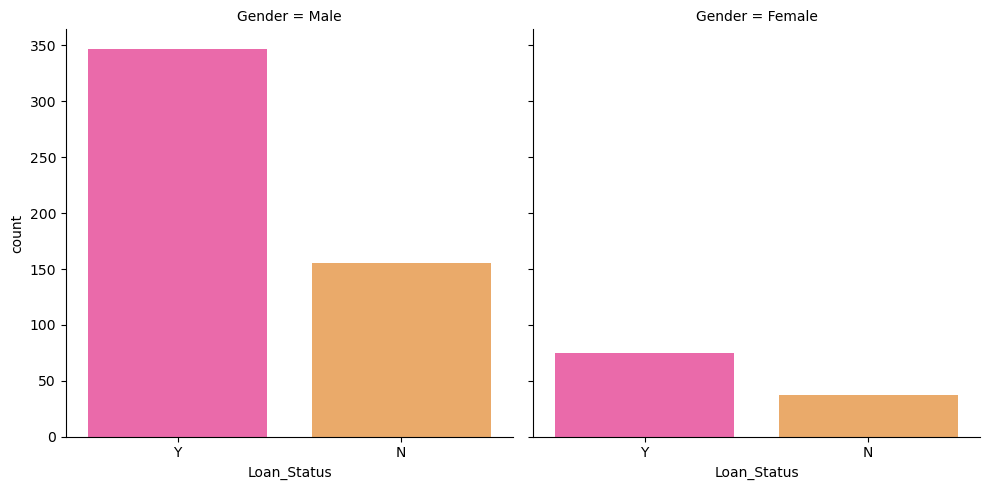

In [88]:
#checking Loan_status and gender
sns.catplot(x='Loan_Status', col='Gender',kind='count', data=df, palette='spring')

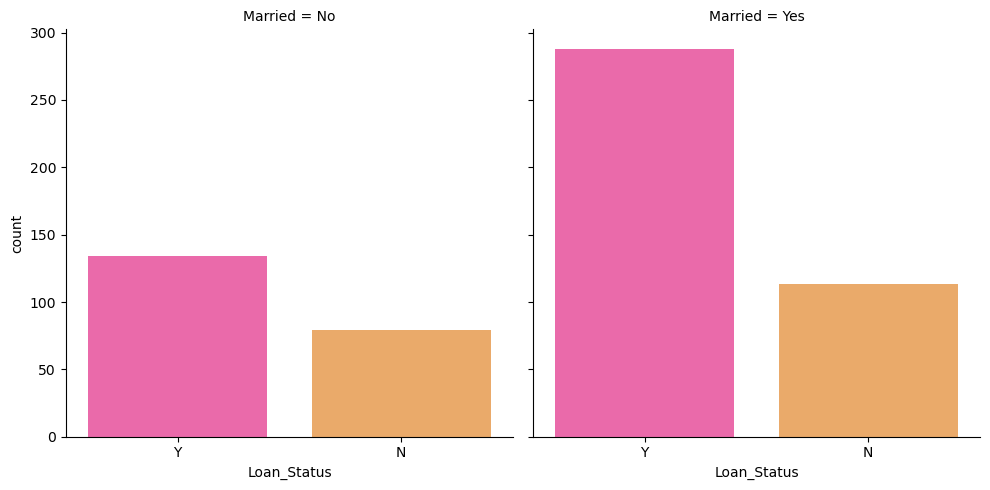

In [89]:
#checking Loan_status and married
sns.catplot(x='Loan_Status', col='Married',kind='count', data=df, palette='spring')

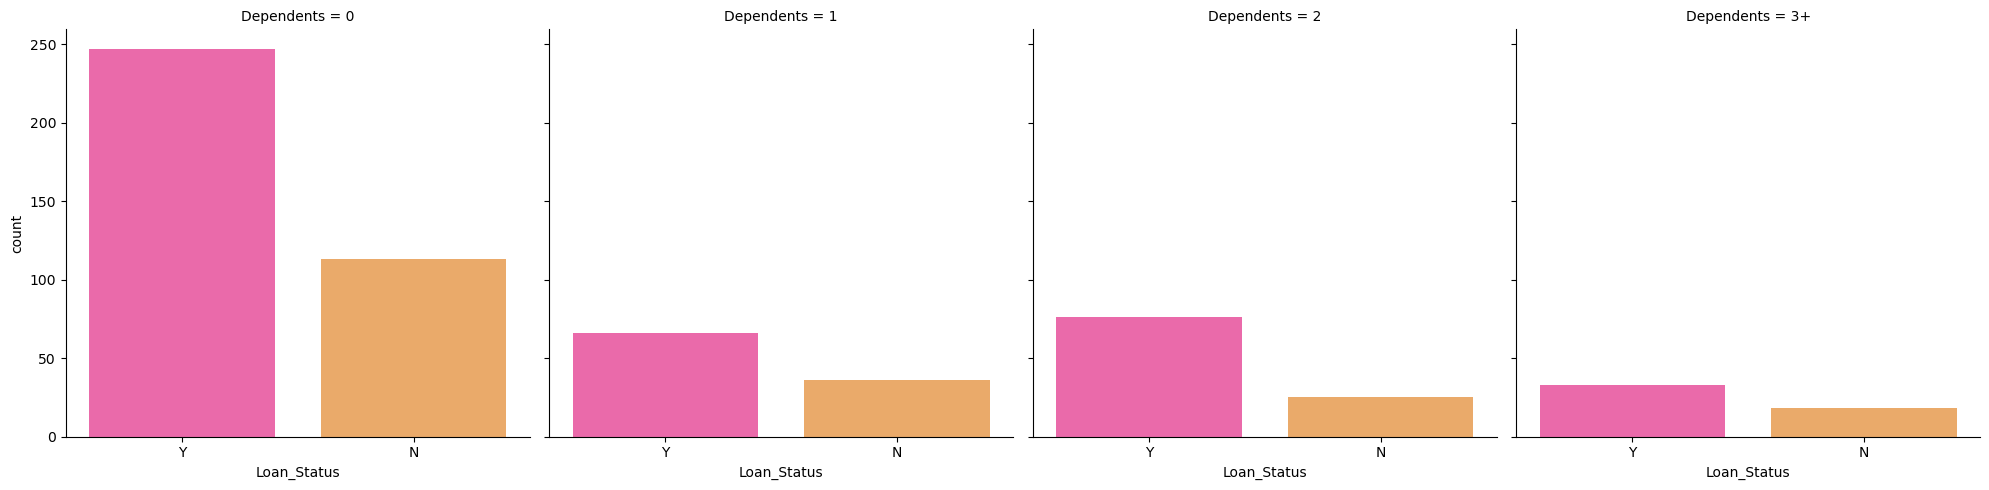

In [90]:
#checking Loan_status and Dependent
sns.catplot(x='Loan_Status', col='Dependents',kind='count', data=df, palette='spring')

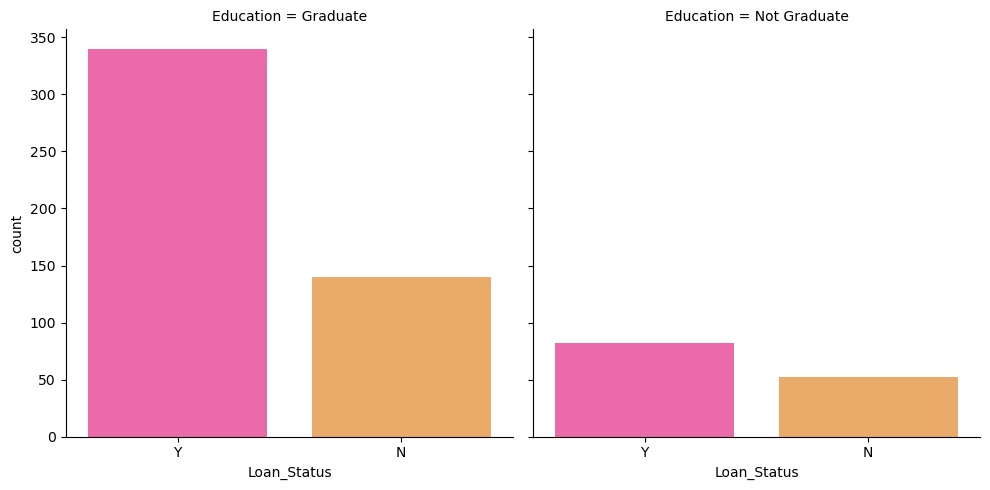

In [92]:
#checking Loan_status and Education
sns.catplot(x='Loan_Status', col='Education',kind='count', data=df, palette='spring')

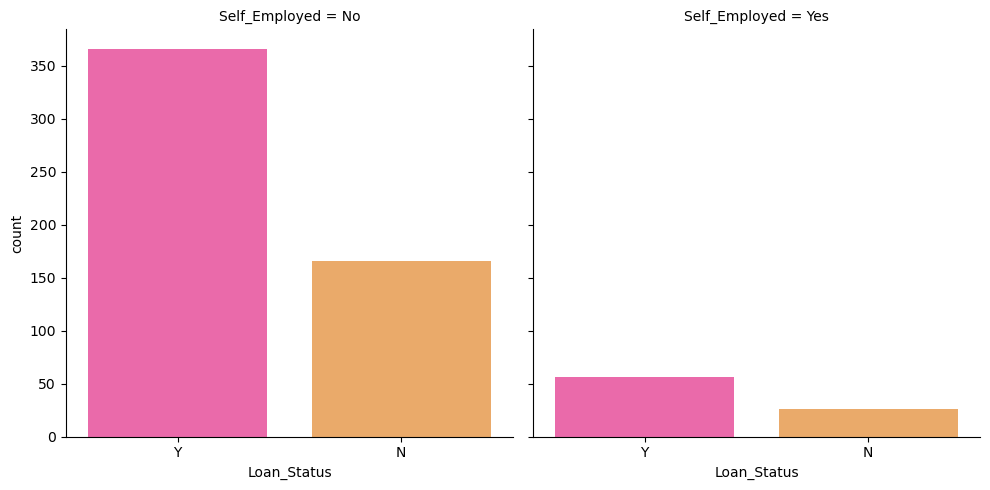

In [93]:
#checking Loan_status and Self_Employed
sns.catplot(x='Loan_Status', col='Self_Employed',kind='count', data=df, palette='spring')

# Multivirate Analysis

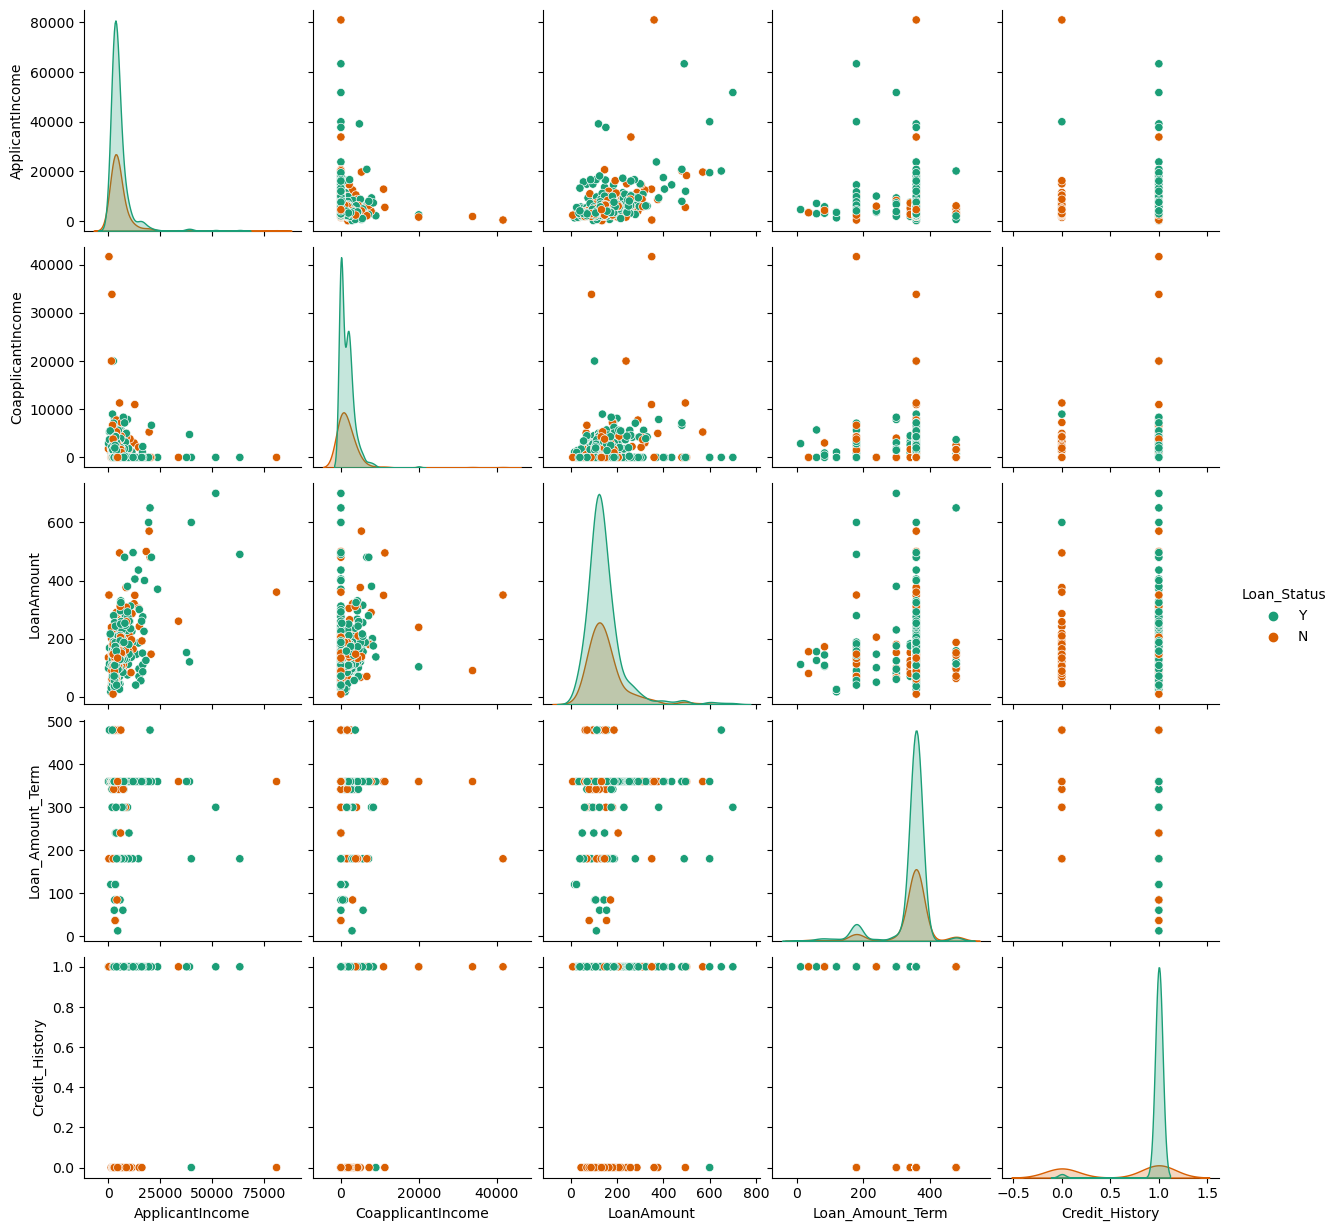

In [94]:
#multivirate analysis of dataset
sns.pairplot(df,hue='Loan_Status',palette='Dark2')
plt.show()

# Checking for outliers

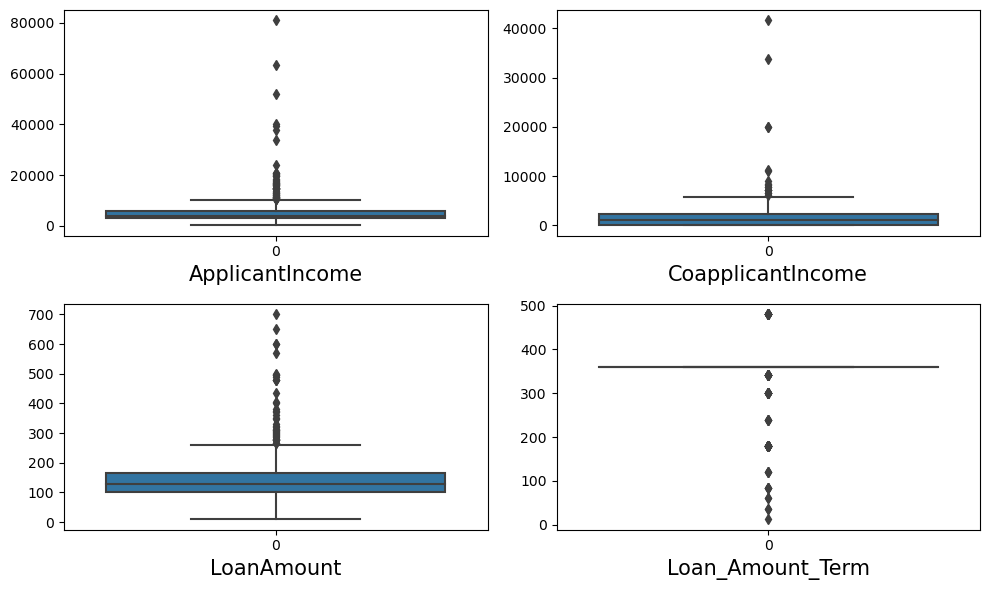

In [95]:
plt.figure(figsize=(10,6), facecolor='white')
plotnumber=1
for i in numerical_col:
    if plotnumber<=4:
        plt.subplot(2,2,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Checking Corelation

<Axes: >

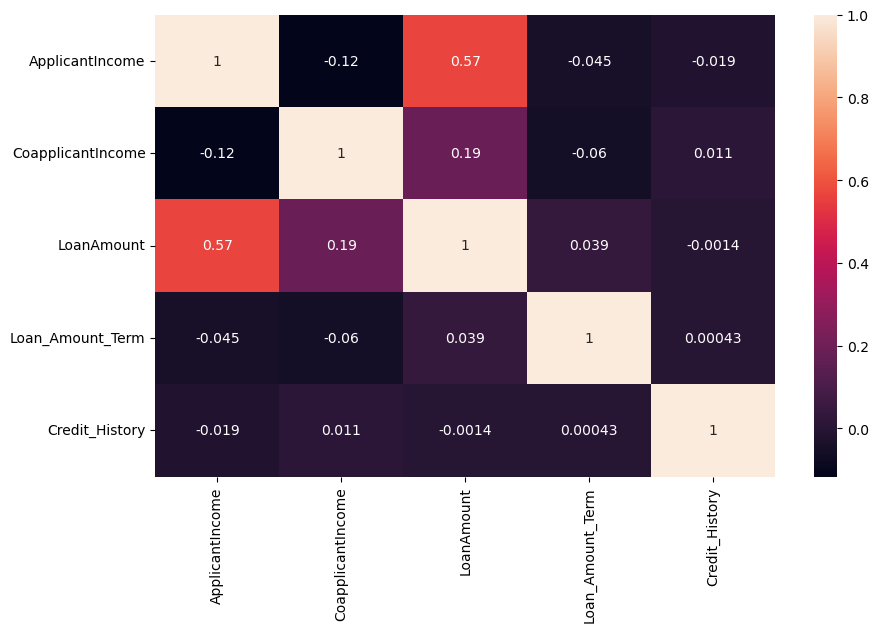

In [97]:
plt.figure(figsize=(10,6), facecolor='white')
sns.heatmap(df.corr(),annot=True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Encoding the Categorical Columns using ordinal encoding

In [101]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [102]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


# Checking Description

In [103]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


# Checking Corelation again

<Axes: >

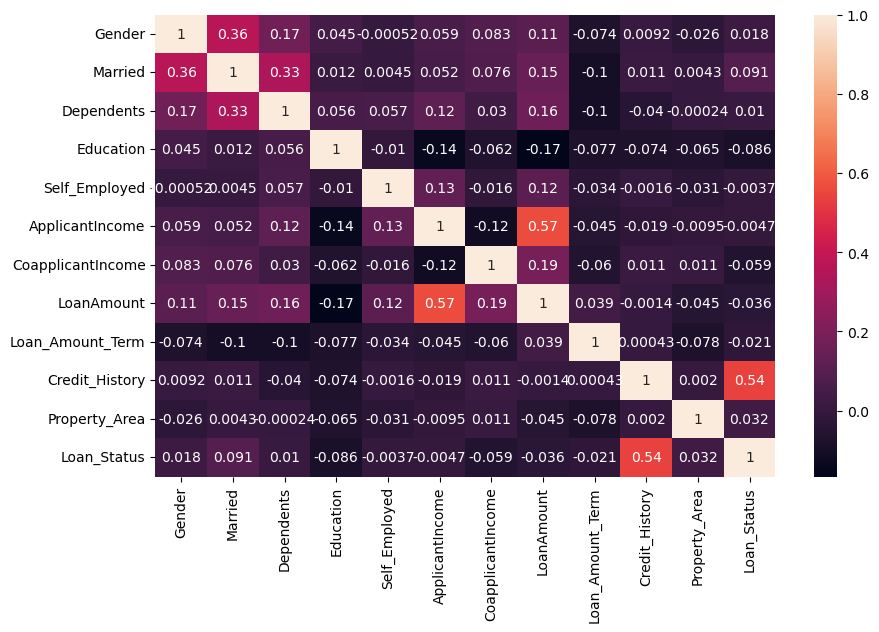

In [106]:
plt.figure(figsize=(10,6), facecolor='white')
sns.heatmap(df.corr(),annot=True)

# Seperating dependent and independent features

In [111]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

# importing the train test split


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,)

# importing the models

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [115]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

svc=SVC()
svc.fit(x_train,y_train)

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [116]:
y_pred1=lr.predict(x_test)
y_pred2=svc.predict(x_test)
y_pred3=rfc.predict(x_test)
y_pred4=gbc.predict(x_test)

In [118]:
models=pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svc':y_pred2,'rfc':y_pred3,'gbc':y_pred4})
models

,Actual,Lr,svc,rfc,gbc
303,1.0,1.0,1.0,1.0,1.0
574,0.0,1.0,1.0,1.0,1.0
600,0.0,0.0,1.0,0.0,0.0
89,1.0,1.0,1.0,1.0,1.0
120,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...
151,1.0,1.0,1.0,1.0,1.0
315,1.0,1.0,1.0,1.0,1.0
483,1.0,1.0,1.0,1.0,1.0
188,1.0,1.0,1.0,1.0,0.0


# checking accuracy score

In [119]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [120]:
#checking  score of LogisticRegression
score1=accuracy_score(y_test,y_pred1)
score1

0.8373983739837398

In [121]:
#checking  score of svc
score2=accuracy_score(y_test,y_pred2)
score2

0.6991869918699187

In [122]:
#checking  score of RandomForest classifier
score3=accuracy_score(y_test,y_pred3)
score3

0.7723577235772358

In [123]:
#checking  score of gradient boosting classifier
score4=accuracy_score(y_test,y_pred4)
score4

0.8048780487804879

# Checking Precision Score

In [124]:
#checking precision of of our models
pscore1=accuracy_score(y_test,y_pred1)
pscore2=accuracy_score(y_test,y_pred2)
pscore3=accuracy_score(y_test,y_pred3)
pscore4=accuracy_score(y_test,y_pred4)

In [125]:
print(pscore1,pscore2,pscore3,pscore4)

0.8373983739837398 0.6991869918699187 0.7723577235772358 0.8048780487804879


In [80]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# while checking the accuracy score LogisticRegression is the best model

In [126]:
import joblib

In [128]:
joblib.dump(lr,'loan_prediction')

['loan_prediction']

# Prediction on new Data

In [135]:
new_data=pd.DataFrame({'Gender':1.0,
 'Married':0.0,
 'Dependents':0.0,
 'Education':0.0,
 'Self_Employed':0.0,
 'ApplicantIncome':5849,
 'CoapplicantIncome':0.0,
 'LoanAmount':146.412162,
 'Loan_Amount_Term':360,
 'Credit_History':1.0,
 'Property_Area':2.0},index=[0])

In [136]:
new_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360,1.0,2.0


In [137]:
model=joblib.load('loan_prediction')

In [138]:
model.predict(new_data)

array([1.])

# end